In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import glob 
import nibabel as nib 
import cv2 
import imageio 
from tqdm.notebook import tqdm 
from ipywidgets import * #for creating dynamic visualizations and interactive controls
from PIL import Image #for creating dynamic visualizations and interactive controls
from fastai.basics import * #for building custom models and working with data pipelines
from fastai.vision.all import * #for image classification, and segmentation
from fastai.data.transforms import * #provides various data transformation functions
import random #for simulations, shuffling data, and creating random samples
from matplotlib.pyplot import figure #Used for creating charts, histograms, scatter plots, and other types of graphs
import nibabel as nib #used for reading and writing NIfTI files
from sklearn.model_selection import train_test_split #to split a dataset into training and testing sets
from tensorflow.keras.layers import * #use to build the architecture of a neural network model.
from tensorflow.keras.models import Model #allows to create a model by specifying its inputs and outputs.
from tensorflow.keras.optimizers import Adam


In [2]:
files = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        files.append((dirname, filename))

In [3]:
df_files = pd.DataFrame(files, columns = ['dirname', 'filename'])

df_files = df_files.sort_values(by = 'filename')

print(df_files.head())

                                                  dirname  \
184                                /kaggle/input/resnet50   
182                                /kaggle/input/resnet50   
183                                /kaggle/input/resnet50   
89   /kaggle/input/liver-tumor-segmentation/segmentations   
81   /kaggle/input/liver-tumor-segmentation/segmentations   

                                                 filename  
184                             imagenet_class_index.json  
182        resnet50_weights_tf_dim_ordering_tf_kernels.h5  
183  resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5  
89                                     segmentation-0.nii  
81                                     segmentation-1.nii  


In [4]:
df_files["mask_dirname"] = ""
df_files["mask_filename"] = ""


for i in range(131):
    ct = f"volume-{i}.nii"
    mask = f"segmentation-{i}.nii"

    df_files.loc[df_files['filename'] == ct, 'mask_filename'] = mask
    df_files.loc[df_files['filename'] == ct, 'mask_dirname'] = "/kaggle/input/liver-tumor-segmentation/segmentations"

# drop segment rows
df_files = df_files[df_files.mask_filename != ''].sort_values(by=['filename']).reset_index(drop=True)

df_files

,dirname,filename,mask_dirname,mask_filename
0,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-0.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-0.nii
1,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-1.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-1.nii
2,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-10.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-10.nii
3,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-11.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-11.nii
4,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-12.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-12.nii
5,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-13.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-13.nii
6,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-14.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-14.nii
7,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-15.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-15.nii
8,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-16.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-16.nii
9,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-17.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-17.nii


In [5]:
def read_nii(filepath):
    ct_scan = nib.load(filepath)
    array = ct_scan.get_fdata()
    array = np.rot90(np.array(array))
    return (array)

In [6]:
sample = 40

sample_ct = read_nii(df_files.loc[sample,'dirname']+"/"+df_files.loc[sample,'filename'])

sample_mask = read_nii(df_files.loc[sample,'mask_dirname']+"/"+df_files.loc[sample,'mask_filename'])

print(f'CT Shape:   {sample_ct.shape}\nMask Shape: {sample_mask.shape}')

CT Shape:   (512, 512, 74)
Mask Shape: (512, 512, 74)


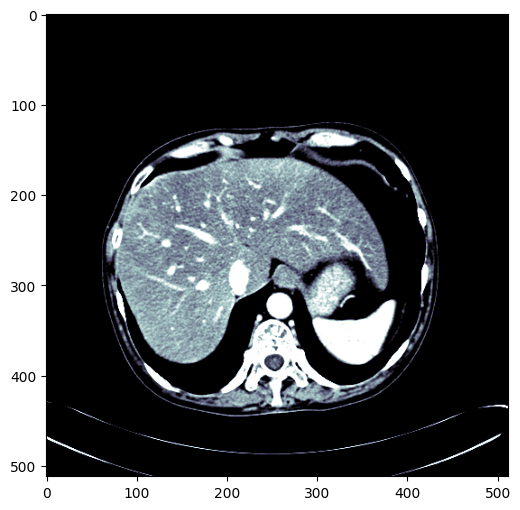

In [7]:
# Preprocess the nii file
#it extends the functionality of PyTorch's
dicom_windows = types.SimpleNamespace(
    brain=(80,40),
    subdural=(254,100),
    stroke=(8,32),
    brain_bone=(2800,600),
    brain_soft=(375,40),
    lungs=(1500,-600),
    mediastinum=(350,50),
    abdomen_soft=(400,50),
    liver=(150,30),
    spine_soft=(250,50),
    spine_bone=(1800,400),
    custom = (200,60)
)
#This decorator is used to add a new method windowed to the Tensor class.
@patch
#clamps pixel values, representing windowed image 
def windowed(self:Tensor, w, l):
    px = self.clone()
    px_min = l - w//2
    px_max = l + w//2
    px[px<px_min] = px_min
    px[px>px_max] = px_max
    return (px-px_min) / (px_max-px_min)

figure(figsize=(8, 6), dpi=100)
#the liver window settings (dicom_windows.liver) to the slice to visualize the liver tissue in the CT scan
plt.imshow(tensor(sample_ct[..., 55].astype(np.float32)).windowed(*dicom_windows.liver), cmap=plt.cm.bone);

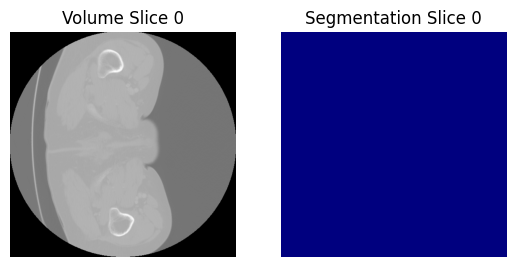

In [8]:
# this code read nii file and show original data

# Load the NIfTI file containing the volume
volume_nifti = nib.load('/kaggle/input/liver-tumor-segmentation/volume_pt1/volume-0.nii')

# Load the NIfTI file containing the segmentation image
segmentation_nifti = nib.load('/kaggle/input/liver-tumor-segmentation/segmentations/segmentation-0.nii')

# Extract the data arrays from the NIfTI files
volume_data = volume_nifti.get_fdata()
segmentation_data = segmentation_nifti.get_fdata()

# Choose a slice to display (e.g., slice 0 along the first axis)
slice_index = 0

# Plot the volume slice
plt.subplot(1, 2, 1)
plt.imshow(volume_data[..., slice_index], cmap='gray')
plt.title('Volume Slice {}'.format(slice_index))
plt.axis('off')

# Plot the segmentation slice
plt.subplot(1, 2, 2)
plt.imshow(segmentation_data[..., slice_index], cmap='jet')  # Adjust the colormap as needed
plt.title('Segmentation Slice {}'.format(slice_index))
plt.axis('off')

plt.show()

In [9]:
def plot_sample(array_list, color_map = 'nipy_spectral'):
    '''
    Plots and a slice with all available annotations
    '''
    fig = plt.figure(figsize=(20,16), dpi=100)

    plt.subplot(1,4,1)
    plt.imshow(array_list[0], cmap='bone')
    plt.title('Original Image')
    plt.axis('off')
    #presumably a medical image, converts it to a PyTorch tensor, and applies windowing using the parameters from dicom_windows.liver. It uses the 'bone' color map for visualization, adds a title "Windowed Image", and turns off the axis.
    plt.subplot(1,4,2)
    plt.imshow(tensor(array_list[0].astype(np.float32)).windowed(*dicom_windows.liver), cmap='bone');
    plt.title('Windowed Image')
    plt.axis('off')

    plt.subplot(1,4,3)
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Mask')
    plt.axis('off')

    plt.subplot(1,4,4)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Liver & Mask')
    plt.axis('off')

    plt.show()

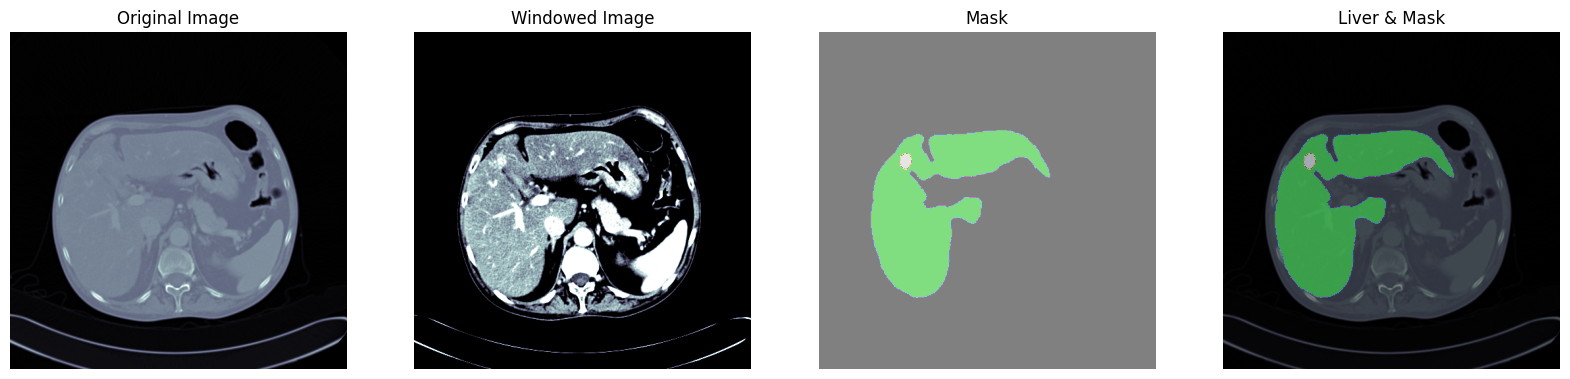

In [10]:
sample = 40

sample_slice = tensor(sample_ct[...,sample].astype(np.float32))

plot_sample([sample_ct[..., sample],
             sample_mask[..., sample]])

<Axes: >

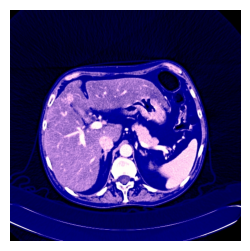

In [11]:
# Preprocessing functions
class TensorCTScan(TensorImageBW): _show_args = {'cmap':'bone'} #a subclass of a PyTorch Tensor designed to handle black-and-white images.

@patch
def freqhist_bins(self:Tensor, n_bins=100):
    "A function to split the range of pixel values into groups, such that each group has around the same number of pixels"
    imsd = self.view(-1).sort()[0]
    t = torch.cat([tensor([0.001]),
                   torch.arange(n_bins).float()/n_bins+(1/2/n_bins),
                   tensor([0.999])])
    t = (len(imsd)*t).long()
    return imsd[t].unique()

@patch
def hist_scaled(self:Tensor, brks=None):
    "Scales a tensor using `freqhist_bins` to values between 0 and 1"
    if self.device.type=='cuda': return self.hist_scaled_pt(brks)
    if brks is None: brks = self.freqhist_bins()
    ys = np.linspace(0., 1., len(brks))
    x = self.numpy().flatten()
    x = np.interp(x, brks.numpy(), ys)
    return tensor(x).reshape(self.shape).clamp(0.,1.)


@patch
def to_nchan(x:Tensor, wins, bins=None):
    res = [x.windowed(*win) for win in wins]
    if not isinstance(bins,int) or bins!=0: res.append(x.hist_scaled(bins).clamp(0,1))
    dim = [0,1][x.dim()==3]
    return TensorCTScan(torch.stack(res, dim=dim))

@patch
def save_jpg(x:(Tensor), path, wins, bins=None, quality=120): #unction to convert the tensor to a multi-channel image suitable for saving as a JPG.The image is saved with the specified quality.
    fn = Path(path).with_suffix('.jpg')
    x = (x.to_nchan(wins, bins)*255).byte()
    im = Image.fromarray(x.permute(1,2,0).numpy(), mode=['RGB','CMYK'][x.shape[0]==4])
    im.save(fn, quality=quality)

_,axs = subplots(1,1)

sample_slice.save_jpg('test.jpg', [dicom_windows.liver, dicom_windows.custom])
show_image(Image.open('test.jpg'), ax=axs[0], figsize=(8, 6))

In [12]:
GENERATE_JPG_FILES = True

if GENERATE_JPG_FILES:

    path = Path(".")

    os.makedirs('train_images', exist_ok=True)
    os.makedirs('train_masks', exist_ok=True)

    ## test folder
    os.makedirs('test_images', exist_ok=True)
    os.makedirs('test_masks', exist_ok=True)

    # Split the data into train and test sets
    train_df, test_df = train_test_split(df_files, test_size=0.1, random_state=42)

    # Check if train_df is empty
    print("Length of train_df:", len(train_df))

    # Reset index for contiguous indices
    train_df = train_df.reset_index(drop=True)
    # Check if test_df is empty
    print("Length of test_df:", len(test_df))
    test_df = test_df.reset_index(drop=True)

    # Loop for training set
    for ii in tqdm(range(len(train_df))):
        curr_ct = read_nii(train_df.loc[ii, 'dirname'] + "/" + train_df.loc[ii, 'filename'])
        curr_mask = read_nii(train_df.loc[ii, 'mask_dirname'] + "/" + train_df.loc[ii, 'mask_filename'])
        curr_file_name = str(train_df.loc[ii, 'filename']).split('.')[0]
        curr_dim = curr_ct.shape[2]

        for curr_slice in range(0, curr_dim, 2):
            data = tensor(curr_ct[..., curr_slice].astype(np.float32))
            mask = Image.fromarray(curr_mask[..., curr_slice].astype('uint8'), mode="L")
            data.save_jpg(f"train_images/{curr_file_name}_slice_{curr_slice}.jpg", [dicom_windows.liver, dicom_windows.custom])
            mask.save(f"train_masks/{curr_file_name}_slice_{curr_slice}_mask.png")

    ### test image save
    for ii in tqdm(range(len(test_df))):
        curr_ct = read_nii(test_df.loc[ii, 'dirname'] + "/" + test_df.loc[ii, 'filename'])
        curr_mask = read_nii(test_df.loc[ii, 'mask_dirname'] + "/" + test_df.loc[ii, 'mask_filename'])
        curr_file_name = str(test_df.loc[ii, 'filename']).split('.')[0]
        curr_dim = curr_ct.shape[2]

        for curr_slice in range(0, curr_dim, 2):
            data = tensor(curr_ct[..., curr_slice].astype(np.float32))
            mask = Image.fromarray(curr_mask[..., curr_slice].astype('uint8'), mode="L")
            data.save_jpg(f"test_images/{curr_file_name}_slice_{curr_slice}.jpg", [dicom_windows.liver, dicom_windows.custom])
            mask.save(f"test_masks/{curr_file_name}_slice_{curr_slice}_mask.png")

else:
    path = Path("../input/liver-segmentation-with-fastai-v2")  # read jpg from saved kernel output

Length of train_df: 45
Length of test_df: 6


  0%|          | 0/45 [00:00<?, ?it/s]

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


  0%|          | 0/6 [00:00<?, ?it/s]

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


In [13]:
print("\nTraining set:")
print(train_df.head())

print("\nTesting set:")
print(test_df.head())


Training set:
                                             dirname       filename  \
0  /kaggle/input/liver-tumor-segmentation/volume_pt3  volume-24.nii   
1  /kaggle/input/liver-tumor-segmentation/volume_pt4  volume-38.nii   
2  /kaggle/input/liver-tumor-segmentation/volume_pt2  volume-11.nii   
3  /kaggle/input/liver-tumor-segmentation/volume_pt4  volume-36.nii   
4  /kaggle/input/liver-tumor-segmentation/volume_pt2  volume-20.nii   

                                           mask_dirname        mask_filename  
0  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-24.nii  
1  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-38.nii  
2  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-11.nii  
3  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-36.nii  
4  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-20.nii  

Testing set:
                                             dirname       filename  \

In [14]:
#setting directories
train_images_dir = '/kaggle/working/train_images'
train_masks_dir = '/kaggle/working/train_masks'

#listing file names
all_image_file_names = sorted(os.listdir(train_images_dir))

#determining the sample size
sample_size = min(9000, len(all_image_file_names))

#random selection of image file names
selected_image_file_names = random.sample(all_image_file_names, sample_size)

#loading the selected images and their masks and resizing them, converting to numpy arrays
target_size = (128, 128)
train_images = [np.array(Image.open(os.path.join(train_images_dir, fname)).resize(target_size)) for fname in selected_image_file_names]

#adjusting the file extension for masks
mask_file_names = [fname.replace('.jpg', '_mask.png') for fname in selected_image_file_names]
train_masks = [np.array(Image.open(os.path.join(train_masks_dir, fname)).resize(target_size)) for fname in mask_file_names]

#conversion of lists to numpy arrays for convinience
train_images = np.array(train_images)
train_masks = np.array(train_masks)

#clamping values between [0,1]
train_images =train_images / 255.0

#reshaping masks to include a dimension channel
train_masks =train_masks.reshape((train_masks.shape[0], train_masks.shape[1], train_masks.shape[2], 1))

In [15]:
#setting directories
test_images_dir = '/kaggle/working/test_images'
test_masks_dir = '/kaggle/working/test_masks'
#listing file names
all_image_file_names = sorted(os.listdir(test_images_dir))

#determining the sample size
sample_size = min(9000, len(all_image_file_names))

#random selection of image file names
selected_image_file_names = random.sample(all_image_file_names, sample_size)

#loading the selected images and their masks and resizing them, converting to numpy arrays
target_size = (128, 128)
test_images = [np.array(Image.open(os.path.join(test_images_dir, fname)).resize(target_size)) for fname in selected_image_file_names]

#adjusting the file extension for masks
mask_file_names = [fname.replace('.jpg', '_mask.png') for fname in selected_image_file_names]
test_masks = [np.array(Image.open(os.path.join(test_masks_dir, fname)).resize(target_size)) for fname in mask_file_names]

#conversion of lists to numpy arrays for convinience
test_images = np.array(test_images)
test_masks = np.array(test_masks)

#clamping values between [0,1]
test_images =test_images / 255.0

#reshaping masks to include a dimension channel
test_masks =test_masks.reshape((test_masks.shape[0], test_masks.shape[1], test_masks.shape[2], 1))

In [16]:
print(f"Training images = {len(train_images)} Testing images = {len(test_images)}")

print(f"Training masks = {len(train_masks)} Testing masks = {len(test_masks)}")

Training images = 8556 Testing images = 699
Training masks = 8556 Testing masks = 699


In [17]:
x_valid, x_test, y_valid, y_test = train_test_split(test_images, test_masks, test_size = 1/3, random_state = 42)


In [18]:
print(f"train image={train_images.shape} and train_masks={train_masks.shape}")
print(f"X valid shape ={x_valid.shape} x_test={x_test.shape}")
print(f"y valid shape ={y_valid.shape}  y_test={y_test.shape}")

train image=(8556, 128, 128, 3) and train_masks=(8556, 128, 128, 1)
X valid shape =(466, 128, 128, 3) x_test=(233, 128, 128, 3)
y valid shape =(466, 128, 128, 1)  y_test=(233, 128, 128, 1)


In [19]:
def display_images_and_masks(images, masks, num_samples=2):
    # num_samples is randomly selected from 1-total number of images available
    sample_indices = random.sample(range(images.shape[0]), num_samples)

    
    for i in range(num_samples):
        index = sample_indices[i]  # Get the index of the current sample.

        #  Display the image.
        plt.subplot(num_samples, 2, 2 * i + 1)  # Prepare a subplot.
        plt.imshow(images[index])  # Show the image at the selected index.
        plt.title("Image {}".format(index))  # Set the title for the image.
        plt.axis("off")  # Turn off the axis.

        #  Display the corresponding mask.
        plt.subplot(num_samples, 2, 2 * i + 2)  # Prepare the next subplot.
        plt.imshow(masks[index].squeeze(), cmap='gray')  # Show the mask with a grayscale colormap.
        plt.title("Mask {}".format(index))  # Set the title for the mask.
        plt.axis("off")  # Turn off the axis.

    # Display all the subplots.
    plt.show()

transfer learning using resnet

In [20]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D

def build_model(input_shape=(128, 128, 3), num_classes=1, weights_path=None):
    # Loading the ResNet model without the top layer
    base_model = ResNet50(weights=None, include_top=False, input_tensor=Input(shape=input_shape))

    # Load the pre-trained weights manually
    if weights_path:
        base_model.load_weights(weights_path, by_name=True, skip_mismatch=True)

    # Freezing the layers of the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Custom layers on top of the base model
    x = base_model.output
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(num_classes, (1, 1), activation='sigmoid')(x)

    # Creating and compiling the model
    model = Model(inputs=base_model.input, outputs=x)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Instantiate the model with the updated weights
model = build_model(weights_path='/kaggle/input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')


In [21]:
history = model.fit(train_images, train_masks, batch_size=32, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1379s 5s/step - accuracy: 0.9790 - loss: 0.0961 - val_accuracy: 0.9882 - val_loss: 0.0279
Epoch 2/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1377s 5s/step - accuracy: 0.9832 - loss: 0.0390 - val_accuracy: 0.9894 - val_loss: 0.0268
Epoch 3/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1382s 5s/step - accuracy: 0.9862 - loss: 0.0329 - val_accuracy: 0.9861 - val_loss: 0.0399
Epoch 4/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1368s 5s/step - accuracy: 0.9902 - loss: 0.0260 - val_accuracy: 0.9816 - val_loss: 0.0473
Epoch 5/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1370s 5s/step - accuracy: 0.9883 - loss: 0.0286 - val_accuracy: 0.9897 - val_loss: 0.0266
Epoch 6/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1374s 5s/step - accuracy: 0.9914 - loss: 0.0190 - val_accuracy: 0.9891 - val_loss: 0.0288
Epoch 7/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1386s 5s/step - accuracy: 0.9743 - loss: 0.1031 - val_accuracy: 0.9896 - val_loss: 0.0259
Epoch 8/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1378s 5s/step - accuracy: 0.9906 - loss: 0.0205 - 

In [22]:
def plot_history(history):
    # Plot the training loss values
    plt.plot(history.history['loss'])
    # Plot the validation loss values
    plt.plot(history.history['val_loss'])
    # Set the title of the plot to 'Model loss'
    plt.title('Model loss')
    # Set the y-axis label of the plot to 'Loss'
    plt.ylabel('Loss')
    # Set the x-axis label of the plot to 'Epoch'
    plt.xlabel('Epoch')
    # Add a legend to the plot with labels 'Train' for training loss and 'Validation' for validation loss
    plt.legend(['Train', 'Validation'], loc='upper left')
    # Display the plot
    plt.show()

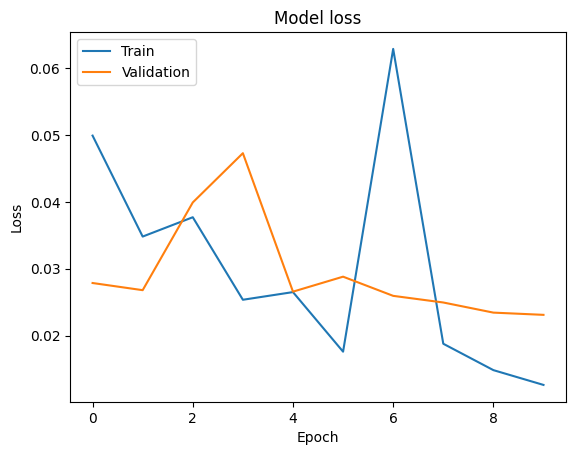

In [23]:
plot_history(history)

In [24]:
scores = model.evaluate(x_valid, y_valid)
accuracy = scores[1]

15/15 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.9909 - loss: 0.0226


In [25]:
prediction = model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step


In [26]:
test_scores = model.evaluate(x_test, y_test)

accuracy = test_scores[1]


8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9918 - loss: 0.0211


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


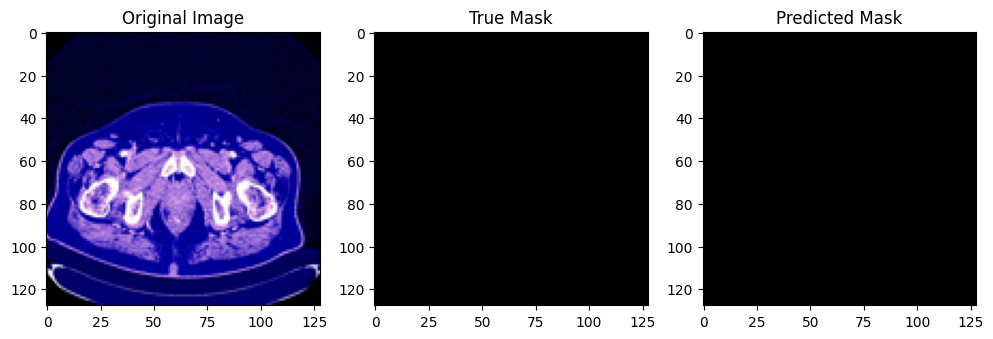

In [27]:
image_index = 12

# Load the image and true mask
input_image = x_test[image_index]
true_mask = y_test[image_index]

# Obtain the predicted mask from model2
predicted_mask = model.predict(np.expand_dims(input_image, axis=0))[0]

# Threshold the predicted mask (assuming it's a binary mask)
threshold = 0.5  # Adjust this threshold based on your model's output
predicted_mask_binary = (predicted_mask > threshold).astype(np.uint8)

# Plotting
plt.figure(figsize=(12, 4))

# Plot original image
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title('Original Image')

# Plot true mask
plt.subplot(1, 3, 2)
plt.imshow(true_mask[:, :, 0], cmap='gray')
plt.title('True Mask')

# Plot predicted mask
plt.subplot(1, 3, 3)
plt.imshow(predicted_mask_binary, cmap='gray')
plt.title('Predicted Mask')

plt.show()

In [28]:
initial_segmentation_results = model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step
